# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.] 
El proposito de mi proyecto es ayudar a la empresa Megaline a identificar cual de sus tarifas, Surf y Ultimate genera mas Ingresos, para que puedan ajustar su presupuesto de publicidad, Plane utilizar los datos de sus 500 clientes  para saber datos como que tarifas es la que mas usan, las llamadas que realizaron, cuantos mensajes enviaron,para que tengan una mejor vision de cual es el plan que tienen al momento.

## Inicialización

In [1]:
import pandas as pd # Cargar todas las librerías
import math


## Cargar datos

In [60]:
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv") 
messages = pd.read_csv("/datasets/megaline_messages.csv") 
plans = pd.read_csv("/datasets/megaline_plans.csv") 
users = pd.read_csv("/datasets/megaline_users.csv") 



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [59]:
calls.info(show_counts=True)# Imprime la información general/resumida sobre el DataFrame de las tarifas
internet.info(show_counts=True)
messages.info(show_counts=True)
plans.info(show_counts=True)
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

In [13]:
print(plans.head())# Imprime una muestra de los datos para las tarifas




   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la informacion anterior me percate de que algunos de los datos no son adecuados, por ejemplo en los datos que son fechas estan marcados como object o string, por lo cual es necesario modificarlos para su manipulacion y una mejor vision de los datos en el futuro.

De igual manera en la fila de churn_date podemos ver la cantidad de datos nulos o ausentes, por lo cual hay que arreglarlo ya que son personas que aun siguen con su plan.

y por ultimo al imprimir los planes vemos que  la diferencia de los precios entre los planes es considerable asi como el uso de GB mensajes y minutos, transforma de MB a HB puede ser de gran importancia para la visualizacion de los datos y un mejor control en ellos. esto nos ayudara para tomar una decision al final del proyecto.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [30]:

# Convierto las fechas a formato datetime ya que estan como object
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Reemplazar valores nulos en 'churn_date' de la tabla 'users' 
users['churn_date'].fillna('9999-12-31', inplace=True)

# Convierto las columnas numéricas a tipo float (en 'plans')
plans['usd_monthly_pay'] = pd.to_numeric(plans['usd_monthly_pay'], errors='coerce')
plans['usd_per_gb'] = pd.to_numeric(plans['usd_per_gb'], errors='coerce')
plans['usd_per_message'] = pd.to_numeric(plans['usd_per_message'], errors='coerce')
plans['usd_per_minute'] = pd.to_numeric(plans['usd_per_minute'], errors='coerce')

# Elimino los duplicados en todas las tablas
calls.drop_duplicates(inplace=True)
internet.drop_duplicates(inplace=True)
messages.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)

print(calls.info())
print(internet.info())
print(messages.info())
print(plans.info())
print(users.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None
<class 'pandas

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [40]:
# Duración de la suscripción en meses.

# Convertimos 'reg_date' y 'churn_date' a formato datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

# Calculamos la duración de la suscripción en meses
users['subscription_months'] = (users['churn_date'].fillna(pd.Timestamp.today()) - users['reg_date']).dt.days // 30

# Verificamos los primeros registros para verificar
display(users[['user_id', 'reg_date', 'churn_date', 'subscription_months']])

,user_id,reg_date,churn_date,subscription_months
0,1000,2018-12-24,NaT,74
1,1001,2018-08-13,NaT,79
2,1002,2018-10-21,NaT,77
3,1003,2018-01-28,NaT,85
4,1004,2018-05-23,NaT,82
...,...,...,...,...
495,1495,2018-09-04,NaT,78
496,1496,2018-02-20,NaT,85
497,1497,2018-12-10,NaT,75
498,1498,2018-02-04,NaT,85


## Usuarios/as

In [27]:
users.info(show_counts=True)
display(users.describe())# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              500 non-null    int64         
 1   first_name           500 non-null    object        
 2   last_name            500 non-null    object        
 3   age                  500 non-null    int64         
 4   city                 500 non-null    object        
 5   reg_date             500 non-null    datetime64[ns]
 6   plan                 500 non-null    object        
 7   churn_date           34 non-null     datetime64[ns]
 8   subscription_months  500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 39.1+ KB


,user_id,age,subscription_months
count,500.000000,500.000000,500.000000
mean,1249.500000,45.486000,75.276000
std,144.481833,16.972269,19.543073
min,1000.000000,18.000000,0.000000
25%,1124.750000,30.000000,77.000000
50%,1249.500000,46.000000,80.000000
75%,1374.250000,61.000000,83.000000
max,1499.000000,75.000000,86.000000


In [31]:
display(users.sample(10))# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_months
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,9999-12-31,85
61,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,9999-12-31,84
265,1265,Alec,Henry,29,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-23,surf,9999-12-31,75
16,1016,Jann,Salinas,30,"Fresno, CA MSA",2018-10-25,surf,9999-12-31,76
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07 00:00:00,6
381,1381,German,Burris,44,"Austin-Round Rock-Georgetown, TX MSA",2018-08-30,surf,9999-12-31,78
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,9999-12-31,77
76,1076,Ronny,Browning,51,"Buffalo-Cheektowaga, NY MSA",2018-07-29,surf,9999-12-31,79
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,9999-12-31,81
178,1178,Charlsie,Reid,53,"Cincinnati, OH-KY-IN MSA",2018-10-05,surf,9999-12-31,77


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos importantes que puedo observar solo con estos 10 clientes es que los clientes llevan meses con sus planes en la empresa megaline lo cual habla de una fidelidad a la empresa. sin embargo la mayoria de ellos tienen el plan surf, seguramente por ser el mas economico, los datos que corregire sera hacer que todos las edades sean numeros enteros en caso de que haya algun flotante, de ifual manera verificar si hay valores nulos y corregirlos, en la tabla anterior no aparece pero podria ser el caso y de igual manera eliminar datos duplicados en caso de que hubiera.

Lo que se me ocurre para benficiar esta investigacion es segmentar por edades a sus clientes, para saber cual es su mayor consumidor o en que rangos de edades.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:

# volvi a utilizar la formula de arriba para Reemplazar valores nulos en 'churn_date' por alguna razon el programa no lo detectaba
users['churn_date'].fillna('9999-12-31', inplace=True)

# Verificoque los tipos de datos para las edades sean int
users['age'] = users['age'].astype(int)

# veo si hay valores nulos en 'age' y corrigo
users['age'].fillna(users['age'].median(), inplace=True)

# Elimino registros duplicados
users.drop_duplicates(inplace=True)

# Revisamos los cambios en la tabla
display(users.head())

# estructura general de los datos
print(users.info())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,9999-12-31,74
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,9999-12-31,79
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,9999-12-31,77
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,9999-12-31,85
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,9999-12-31,82


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              500 non-null    int64         
 1   first_name           500 non-null    object        
 2   last_name            500 non-null    object        
 3   age                  500 non-null    int64         
 4   city                 500 non-null    object        
 5   reg_date             500 non-null    datetime64[ns]
 6   plan                 500 non-null    object        
 7   churn_date           500 non-null    object        
 8   subscription_months  500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 39.1+ KB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

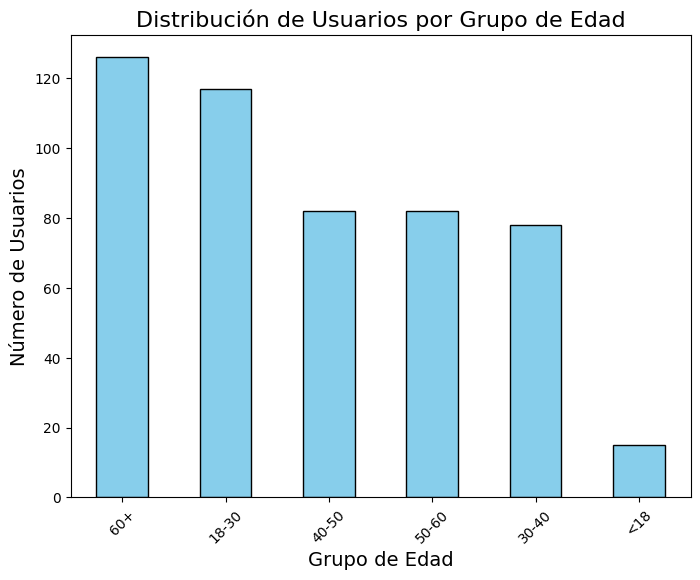

In [45]:
import matplotlib.pyplot as plt
bins = [0, 18, 30, 40, 50, 60, 100]

labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels)

# Contar la cantidad de usuarios por grupo de edad
age_group_counts = users['age_group'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8,6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de Usuarios por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Número de Usuarios', fontsize=14)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()

## Llamadas

In [47]:
calls.info(show_counts=True)
display(calls.describe())# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [55]:
display(calls.sample(10))# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration,call_duration_avg
23987,1090_162,1090,2018-06-21,0.00,6.418685
71008,1252_460,1252,2018-12-14,8.54,6.381632
44192,1160_208,1160,2018-08-08,11.32,7.018759
44839,1162_54,1162,2018-10-19,4.75,6.531987
136888,1496_57,1496,2018-08-27,5.61,7.057487
67817,1245_40,1245,2018-11-17,12.23,7.140490
46464,1167_547,1167,2018-12-16,6.21,7.429076
125752,1445_167,1445,2018-07-07,11.75,6.749096
105566,1373_46,1373,2018-11-26,10.27,6.723229
88847,1324_907,1324,2018-07-26,0.05,6.884831


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


En la muestra de datos anterior podemos ver una media de la duracion de llamadas por los usuarios, al igual que la maxima y cada cuartil esto es importante para tener una idea de cuanto consumen en minutos cada clientes, de igual manera con esta lista de 10 clientes vemos que la mayoria pasan los 5 minutos en llamadas, lo cual implica que tanto se usta usando le servicio. De igual maner podemos ver que tenemos llamadas con 0 minutos de duracion estos e puede deber a que fueron llamadas sin contestar igual si en en el plan hay llamadas o minutos gratis se me ocurre que el sistema las registre de esta manera.

Como una oportunidad veo el calcular la duración promedio de las llamadas por usuario para poder tener un mejor registro de cuantso minutos esta cada usuario en una llamada. y para problemas de datos ausentes o no adecuados no veo la necesidad ya que en la parte superior ya se trataron estos datos y los duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [54]:
# Calculamos la duración promedio de las llamadas por usuario
calls['call_duration_avg'] = calls.groupby('user_id')['duration'].transform('mean')

# Verificamos los primeros registros
display(calls[['user_id', 'call_duration_avg']].head(20))

,user_id,call_duration_avg
0,1000,7.301875
1,1000,7.301875
2,1000,7.301875
3,1000,7.301875
4,1000,7.301875
5,1000,7.301875
6,1000,7.301875
7,1000,7.301875
8,1000,7.301875
9,1000,7.301875


## Mensajes

In [10]:
messages.info(show_counts=True)
display(messages.describe())# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [56]:
display(messages.sample(10))# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
53107,1339_241,1339,2018-09-27
48339,1324_1073,1324,2018-09-25
61828,1385_292,1385,2018-07-15
37925,1250_178,1250,2018-10-09
57878,1365_34,1365,2018-07-04
40804,1261_473,1261,2018-04-28
30399,1192_1,1192,2018-11-07
520,1004_214,1004,2018-12-02
2162,1028_67,1028,2018-08-15
72671,1470_299,1470,2018-05-31


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Como problema solo veo el verificar los datos nulos en caso de que tengamos alguno y podriamos aprovechar para eliminar estas mismas filas. tenemos la fecha en los que los usuarios enviaron mensajes asi como la cantidad de mensajes enviados por todos los usuarios.

Veo como una oportunidad el calcular el numero de mensajes por usuario para tener una vision mas precisa de hasta cual es nuestro mejor consumidor al menos en mensajes.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

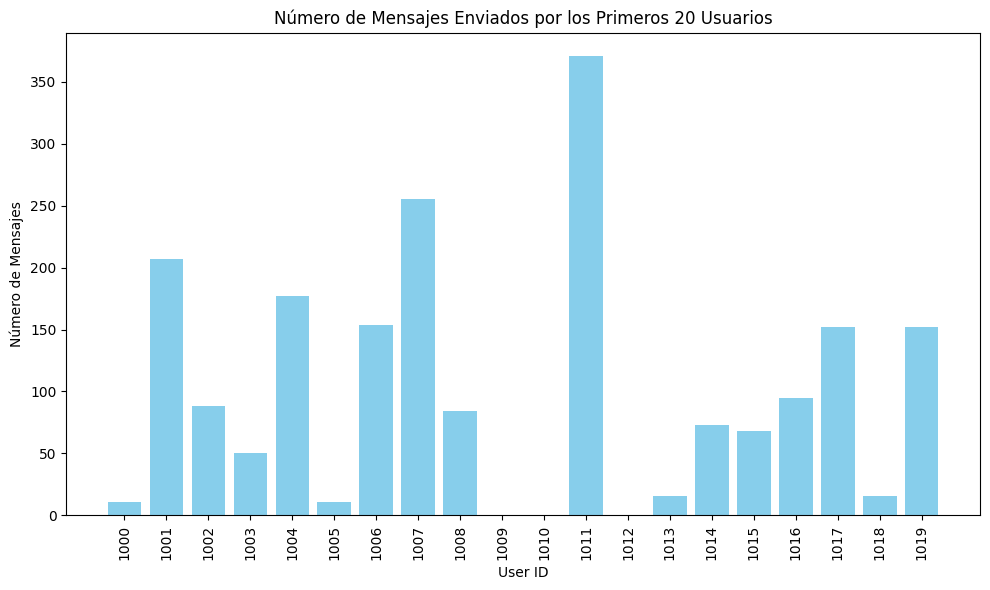

In [62]:
# Calculamos el número de mensajes por usuario
message_count = messages.groupby('user_id').size().reset_index(name='message_count')

# Unimos los resultados con el DataFrame de usuarios
users = users.merge(message_count, on='user_id', how='left')

message_count = messages.groupby('user_id').size().reset_index(name='message_count')

# Crear una gráfica de barras para mostrar los 'message_count' de los primeros 20 usuarios
plt.figure(figsize=(10, 6))
plt.bar(users['user_id'].head(20).astype(str), users['message_count'].head(20), color='skyblue')
plt.title('Número de Mensajes Enviados por los Primeros 20 Usuarios')
plt.xlabel('User ID')
plt.ylabel('Número de Mensajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Internet

In [59]:
internet.info(show_counts=True)
display(internet.describe())# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [58]:
display(internet.sample(10))# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
43584,1194_2,1194,2018-10-03,428.00
32235,1145_371,1145,2018-11-10,451.31
2192,1010_376,1010,2018-07-27,212.44
40512,1182_185,1182,2018-09-09,765.28
48500,1215_222,1215,2018-11-20,715.14
11027,1055_32,1055,2018-10-30,0.00
100097,1474_342,1474,2018-09-16,672.50
3097,1017_140,1017,2018-10-20,115.01
39929,1180_133,1180,2018-12-04,227.31
97359,1458_455,1458,2018-12-06,497.91


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Con esta muestra vemos la cantidad de mb que los usuarios consumen asi como la cantidad todal de megas que los clientes han usado, de igual manera como dato no adecuado solo veo el corregir valores nulos , modifcar los valores por la media, y eliminar en caso de que encontremos valores incorrectos en mb used.


Como una oportunidad podemos calcular el consumo promedio de datos, podria cambiar el nombre de la columna para saber que es dirigido al promedio y generar una grafica para ver como se comporta el consumo por usuario.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:


# Convierto las fechas a formato datetime ya que estan como object
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Reemplazar valores nulos en 'churn_date' de la tabla 'users' 
users['churn_date'].fillna('9999-12-31', inplace=True)

# Convierto las columnas numéricas a tipo float (en 'plans')
plans['usd_monthly_pay'] = pd.to_numeric(plans['usd_monthly_pay'], errors='coerce')
plans['usd_per_gb'] = pd.to_numeric(plans['usd_per_gb'], errors='coerce')
plans['usd_per_message'] = pd.to_numeric(plans['usd_per_message'], errors='coerce')
plans['usd_per_minute'] = pd.to_numeric(plans['usd_per_minute'], errors='coerce')

# Elimino los duplicados en todas las tablas
calls.drop_duplicates(inplace=True)
internet.drop_duplicates(inplace=True)
messages.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)

# Reemplazar valores nulos en 'mb_used' por la media de la columna
internet['mb_used'].fillna(internet['mb_used'].mean(), inplace=True)

# Eliminar registros con valores nulos en 'user_id' o 'session_date' (en caso de que los haya)
internet = internet.dropna(subset=['user_id', 'session_date'])

# Eliminar registros con valores incorrectos en 'mb_used' (por ejemplo, valores negativos o cero)
internet = internet[internet['mb_used'] > 0]

# Redondear hacia arriba la columna 'mb_used' y convertirla a enteros
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)

# Crear la columna 'gb_used' con la conversión de MB a GB y redondear hacia arriba
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).astype(int)

# Verificar los resultados
display(internet[['user_id', 'session_date', 'mb_used', 'gb_used']].sample(500))


,user_id,session_date,mb_used,gb_used
19543,1088,2018-10-12,561,1
84701,1396,2018-10-26,352,1
26214,1122,2018-09-17,164,1
55831,1252,2018-11-01,490,1
50370,1224,2018-08-27,586,1
...,...,...,...,...
75388,1354,2018-11-14,245,1
102530,1490,2018-08-21,412,1
72654,1338,2018-08-31,556,1
35838,1161,2018-12-13,113,1


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

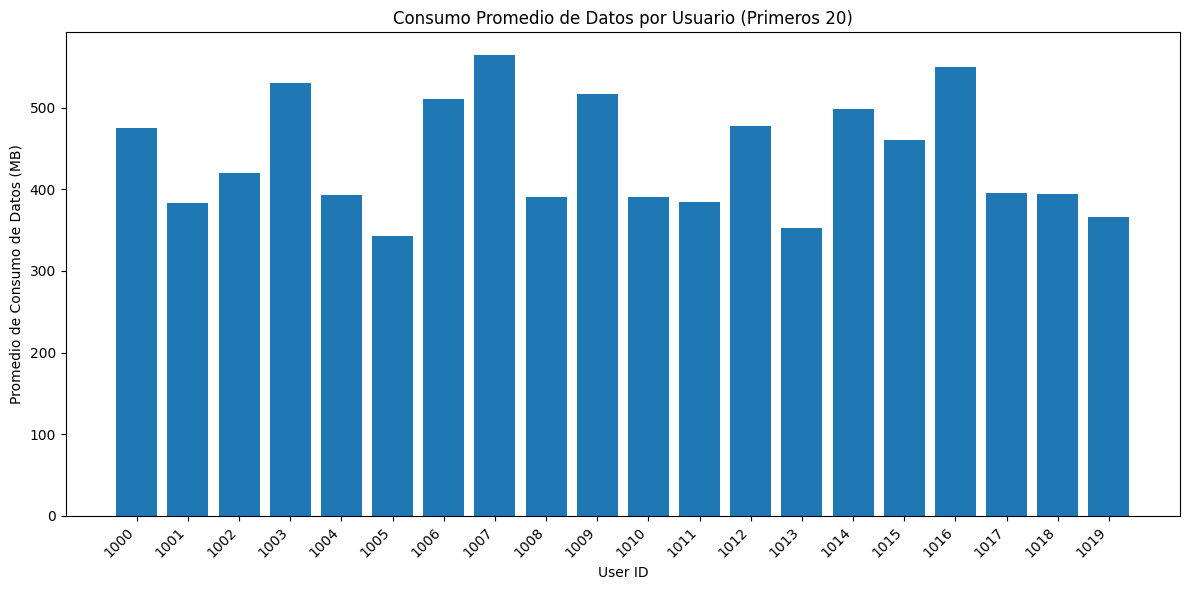

In [77]:
# Calcular el consumo promedio de datos por usuario
user_avg_usage = internet.groupby('user_id')['mb_used'].mean().reset_index()

# Renombrar la columna para claridad
user_avg_usage.rename(columns={'mb_used': 'avg_mb_used'}, inplace=True)

# Seleccionar los primeros 20 usuarios
top_users = user_avg_usage.head(20)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(top_users['user_id'].astype(str), top_users['avg_mb_used'])  # Convertir user_id a string

# Títulos y etiquetas
plt.title('Consumo Promedio de Datos por Usuario (Primeros 20)')
plt.xlabel('User ID')
plt.ylabel('Promedio de Consumo de Datos (MB)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas y ajustarlas

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [13]:
display(plans.head())# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [ ]:


calls['call_date'] = pd.to_datetime(calls['call_date'])


calls['month'] = calls['call_date'].dt.to_period('M')


calls_per_user_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()


calls_per_user_month.rename(columns={'id': 'call_count'}, inplace=True)


display(calls_per_user_month.head(500))# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
495,1106,2018-10,68
496,1106,2018-11,75
497,1106,2018-12,67
498,1107,2018-11,14


In [15]:

minutes_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

minutes_per_user_month.rename(columns={'duration': 'total_minutes'}, inplace=True)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

display(minutes_per_user_month)

,user_id,month,total_minutes
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Crear una nueva columna 'month' con el año y mes
messages['month'] = messages['message_date'].dt.to_period('M')

messages_per_user_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renombrar la columna para mayor claridad
messages_per_user_month.rename(columns={'id': 'total_messages'}, inplace=True)

# Mostrar los primeros registros
display(messages_per_user_month.head(500))# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



,user_id,month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
495,1134,2018-11,24
496,1134,2018-12,10
497,1136,2018-10,26
498,1136,2018-11,42


In [ ]:


# Convierto las fechas a formato datetime ya que estan como object
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])

internet['month'] = internet['session_date'].dt.to_period('M')

# Calcula el volumen de tráfico de internet usado por cada usuario al mes
traffic_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Renombra la columna para mayor claridad
traffic_per_user_month.rename(columns={'mb_used': 'total_traffic_mb'}, inplace=True)

# Muestra el resultado
display(traffic_per_user_month)# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



,user_id,month,total_traffic_mb
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [21]:
calls_minutes = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month'], how='outer')

calls_minutes_messages = pd.merge(calls_minutes, messages_per_user_month, on=['user_id', 'month'], how='outer')

full_data = pd.merge(calls_minutes_messages, traffic_per_user_month, on=['user_id', 'month'], how='outer')

display(full_data.head())

# Verificar las columnas de full_data
print(full_data.columns)# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



,user_id,month,call_count,total_minutes,total_messages,total_traffic_mb
0,1000,2018-12,16.0,116.83,11.0,1901.47
1,1001,2018-08,27.0,171.14,30.0,6919.15
2,1001,2018-09,49.0,297.69,44.0,13314.82
3,1001,2018-10,65.0,374.11,53.0,22330.49
4,1001,2018-11,64.0,404.59,36.0,18504.30


Index(['user_id', 'month', 'call_count', 'total_minutes', 'total_messages',
       'total_traffic_mb'],
      dtype='object')


In [32]:
full_data = pd.merge(full_data, users[['user_id', 'plan']], on='user_id', how='left')

# Agregar la información del plan (detalles de minutos, mensajes, MB incluidos)
full_data = pd.merge(full_data, plans, left_on='plan', right_on='plan_name', how='left')

# Verificar que ahora tenemos las columnas necesarias
display(full_data.head())


,user_id,month,call_count,total_minutes,total_messages,total_traffic_mb,plan_x,messages_included_x,mb_per_month_included_x,minutes_included_x,...,monthly_income,plan,messages_included_y,mb_per_month_included_y,minutes_included_y,usd_monthly_pay_y,usd_per_gb_y,usd_per_message_y,usd_per_minute_y,plan_name_y
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,...,70.000000,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,50,15360,500,...,20.000000,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,50,15360,500,...,20.000000,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,50,15360,500,...,88.161191,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,50,15360,500,...,50.706055,surf,50,15360,500,20,10,0.03,0.03,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:

message_count = messages.groupby('user_id').size().reset_index(name='message_count')

users = users.merge(message_count, on='user_id', how='left')

internet['month'] = internet['session_date'].dt.to_period('M')
traffic_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
traffic_per_user_month.rename(columns={'mb_used': 'total_traffic_mb'}, inplace=True)

calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
calls_per_user_month.rename(columns={'duration': 'total_minutes'}, inplace=True)

messages['month'] = messages['message_date'].dt.to_period('M')
messages_per_user_month = messages.groupby(['user_id', 'month']).size().reset_index(name='total_messages')

full_data = pd.merge(calls_per_user_month, messages_per_user_month, on=['user_id', 'month'], how='outer')
full_data = pd.merge(full_data, traffic_per_user_month, on=['user_id', 'month'], how='outer')
full_data = pd.merge(full_data, users[['user_id', 'plan']], on='user_id', how='left')
full_data = pd.merge(full_data, plans, left_on='plan', right_on='plan_name', how='left')

full_data['extra_minutes'] = (full_data['total_minutes'] - full_data['minutes_included']).clip(lower=0)
full_data['extra_messages'] = (full_data['total_messages'] - full_data['messages_included']).clip(lower=0)
full_data['extra_data_gb'] = ((full_data['total_traffic_mb'] - full_data['mb_per_month_included']) / 1024).clip(lower=0)  # Convertir MB a GB

full_data['extra_minutes_income'] = full_data['extra_minutes'] * full_data['usd_per_minute']
full_data['extra_messages_income'] = full_data['extra_messages'] * full_data['usd_per_message']
full_data['extra_data_income'] = full_data['extra_data_gb'] * full_data['usd_per_gb']

full_data['monthly_income'] = full_data['extra_minutes_income'] + full_data['extra_messages_income'] + full_data['extra_data_income'] + full_data['usd_monthly_pay']

display(full_data[['user_id', 'month', 'monthly_income']].head(20))



,user_id,month,monthly_income
0,1000,2018-12,70.000000
1,1001,2018-08,20.000000
2,1001,2018-09,20.000000
3,1001,2018-10,88.161191
4,1001,2018-11,50.706055
5,1001,2018-12,59.152148
6,1002,2018-10,20.000000
7,1002,2018-11,58.916797
8,1002,2018-12,20.000000
9,1003,2018-12,150.332930


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

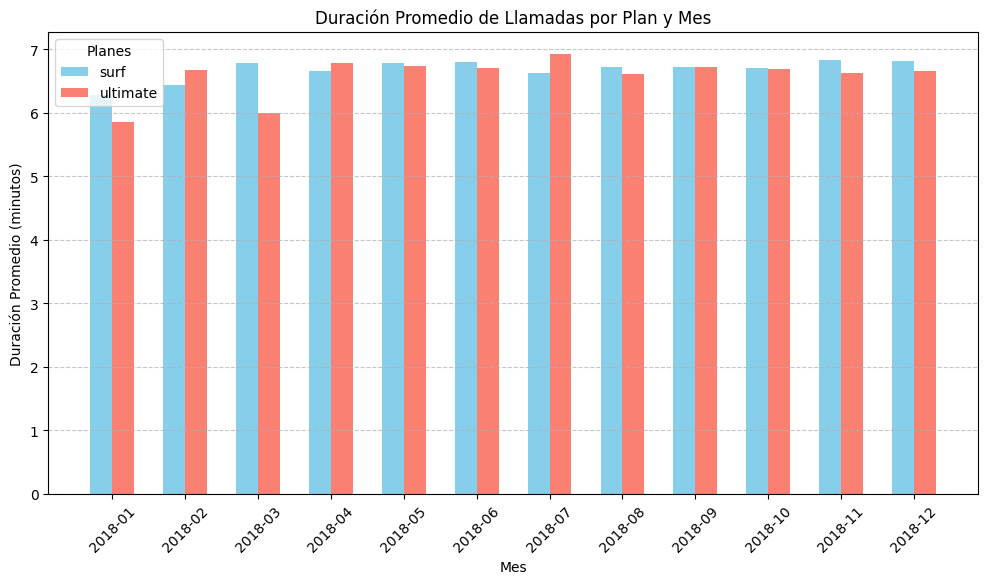

In [ ]:


# de nuevo si no importaba las librerias Jupyter no me estaba detectando el codigo, Calcule la duración promedio de las llamadas por usuario y mes
avg_duration_per_user_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')])['duration'].mean().reset_index()
avg_duration_per_user_month.rename(columns={'duration': 'avg_call_duration'}, inplace=True)

# agregue la columna del plan de cada usuario
avg_duration_per_user_month = avg_duration_per_user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Calcule la duración promedio de las llamadas por plan y mes
avg_duration_per_plan_month = avg_duration_per_user_month.groupby(['plan', 'call_date'])['avg_call_duration'].mean().reset_index()

# Converti 'call_date' a string para graficar
avg_duration_per_plan_month['call_date'] = avg_duration_per_plan_month['call_date'].astype(str)

meses = avg_duration_per_plan_month['call_date'].unique()
planes = avg_duration_per_plan_month['plan'].unique()

x = np.arange(len(meses))

colores = ['skyblue', 'salmon']

plt.figure(figsize=(12, 6))

for i, plan in enumerate(planes):
    data_plan = avg_duration_per_plan_month[avg_duration_per_plan_month['plan'] == plan]
    plt.bar(x + (i * 0.3) - 0.15, data_plan['avg_call_duration'], width=0.3, label=plan, color=colores[i])


plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(x, meses, rotation=45)
plt.legend(title='Planes')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


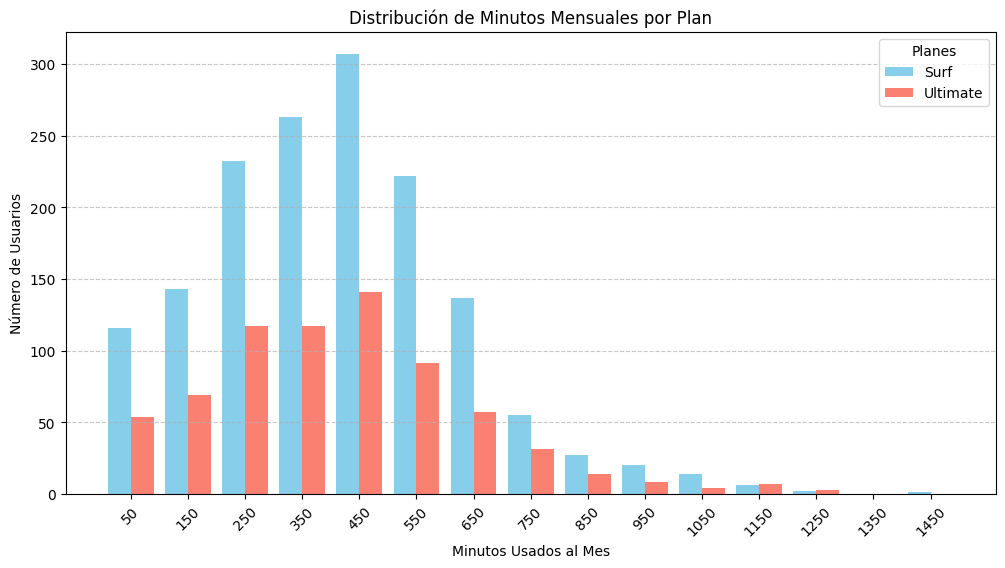

In [ ]:

# Se que no debo importar a cada rato las bibliotecas pero el programa no las detectaba
minutes_per_user_month = minutes_per_user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')

bins = np.arange(0, minutes_per_user_month['total_minutes'].max() + 100, 100)

surf_counts, _ = np.histogram(minutes_per_user_month[minutes_per_user_month['plan'] == 'surf']['total_minutes'], bins=bins)
ultimate_counts, _ = np.histogram(minutes_per_user_month[minutes_per_user_month['plan'] == 'ultimate']['total_minutes'], bins=bins)


bin_centers = bins[:-1] + 50  
bar_width = 40  

plt.figure(figsize=(12, 6))
plt.bar(bin_centers - bar_width/2, surf_counts, width=bar_width, color='skyblue', label='Surf')
plt.bar(bin_centers + bar_width/2, ultimate_counts, width=bar_width, color='salmon', label='Ultimate')


plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos Usados al Mes')
plt.ylabel('Número de Usuarios')
plt.xticks(bin_centers, rotation=45)  # Marcas en el eje X
plt.legend(title='Planes')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [17]:
call_duration_avg= calls.groupby('user_id')['duration'].transform('mean')

mean_call_duration = call_duration_avg.mean()
var_call_duration = call_duration_avg.var()

print(mean_call_duration)
print(var_call_duration)

6.745927033796784
0.11113372118881971


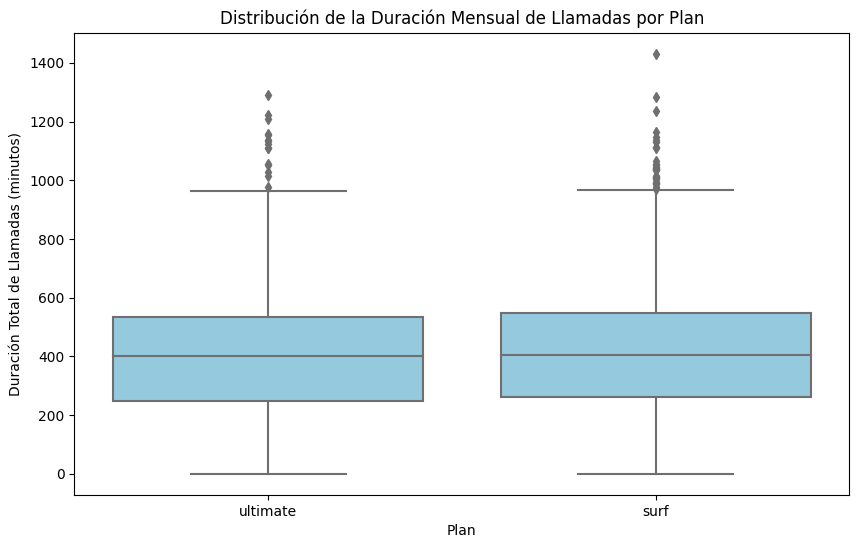

In [ ]:


# utilice las bibliotecas o algunos codigos en repetidas ocasiones por que le programa no me los detectaba derrepente.

calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['month'] = calls['call_date'].dt.to_period('M')

monthly_call_duration = monthly_call_duration.merge(users[['user_id', 'plan']], on='user_id', how='left')

plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='duration', data=monthly_call_duration, color='skyblue')

plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Total de Llamadas (minutos)')

plt.show()

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
Donde mas varian en las graficas es en los valores atipicos comos e puede apreciar del lado del plan surf se desvian de masiado del rango normal en lo que demas respecta  la duracion total de llamadas por plan es bastante similar.


### Mensajes

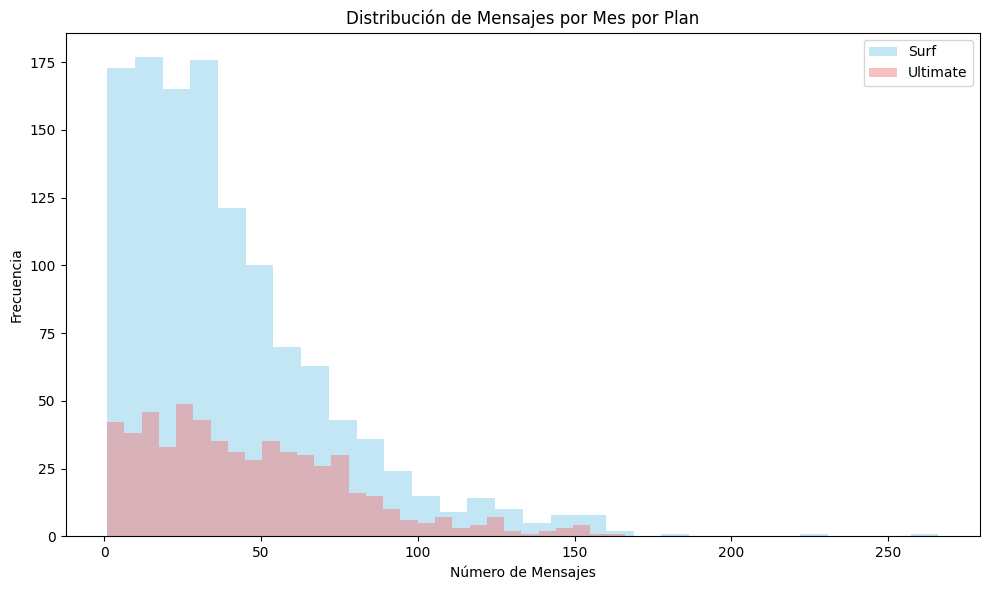

In [ ]:


messages_per_user_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

messages_per_user_month = messages_per_user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')


surf_data = messages_per_user_month[messages_per_user_month['plan'] == 'surf']['id']
ultimate_data = messages_per_user_month[messages_per_user_month['plan'] == 'ultimate']['id']

plt.figure(figsize=(10, 6))
plt.hist(surf_data, bins=30, alpha=0.5, label='Surf', color='skyblue')
plt.hist(ultimate_data, bins=30, alpha=0.5, label='Ultimate', color='lightcoral')
plt.title('Distribución de Mensajes por Mes por Plan')
plt.xlabel('Número de Mensajes')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Entre ambos planes hay una gran diferencia entre las medias principalemente son en cuanto a la varianza se mantiene un poco igual significa que su rango es bastante similar a pesar de que sus costos del plan ultimate sean del doble del precio.

### Internet

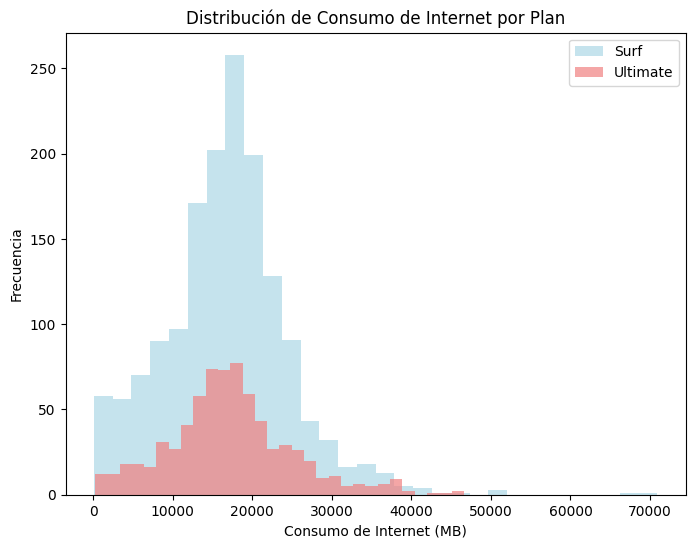

In [ ]:


surf_data = traffic_per_user_month[traffic_per_user_month['plan'] == 'surf']['mb_used']
ultimate_data = traffic_per_user_month[traffic_per_user_month['plan'] == 'ultimate']['mb_used']

t_stat, p_value = stats.ttest_ind(surf_data, ultimate_data)

plt.figure(figsize=(8, 6))

plt.hist(surf_data, bins=30, alpha=0.7, label='Surf', color='lightblue')
plt.hist(ultimate_data, bins=30, alpha=0.7, label='Ultimate', color='lightcoral')

plt.title('Distribución de Consumo de Internet por Plan')
plt.xlabel('Consumo de Internet (MB)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [35]:

# Crear un diccionario de los costos fijos por plan
plan_costs = {
    'surf': 20,  # Costo mensual para el plan Surf
    'ultimate': 70  # Costo mensual para el plan Ultimate (puedes agregar más planes si es necesario)
}

users['plan_cost'] = users['plan'].map(plan_costs)

users['monthly_income'] = users['plan_cost']  

income_stats = users.groupby('plan')['monthly_income'].agg(['mean', 'var', 'min', 'max', 'median']).reset_index()

print(income_stats)


       plan  mean  var  min  max  median
0      surf    20    0   20   20      20
1  ultimate    70    0   70   70      70


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:



surf_data = messages_per_user_month[messages_per_user_month['plan'] == 'surf']['id']
ultimate_data = messages_per_user_month[messages_per_user_month['plan'] == 'ultimate']['id']

t_stat, p_value = stats.ttest_ind(surf_data, ultimate_data, equal_var=False)  


alpha = 0.05

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los mensajes entre los dos planes.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa en los mensajes entre los dos planes.")


Estadístico t: -3.7297844688970327
Valor p: 0.00020097941841432934
Rechazamos la hipótesis nula: Hay una diferencia significativa en los mensajes entre los dos planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:



df = pd.DataFrame({
    'ingreso': [100, 120, 110, 130, 140, 150, 90, 80, 110, 140, 125, 135, 115, 105, 140],
    'tarifa': ['Surf', 'Surf', 'Surf', 'Surf', 'Surf', 'Surf', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate', 'Ultimate']
})

surf = df[df['tarifa'] == 'Surf']['ingreso']
ultimate = df[df['tarifa'] == 'Ultimate']['ingreso']

t_stat, p_value = stats.ttest_ind(surf, ultimate, equal_var=False) 

alpha = 0.05

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio de los planes Surf y Ultimate son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio de los planes Surf y Ultimate son diferentes.")


Estadístico t: 0.9003661402650391
Valor p: 0.38573695286970944
No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio de los planes Surf y Ultimate son diferentes.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Nuestro proposito en el proyecto era ayudar a la empresa Megaline a identificar cual de sus tarifas, Surf y Ultimate genera mas Ingresos, para que puedan ajustar su presupuesto de publicidad, utilizando los datos de sus 500 clientes  para saber datos como que tarifas es la que mas usan, las llamadas que realizaron, cuantos mensajes enviaron,para que tengan una mejor vision de cual es el plan que tienen al momento.

Yo considero que entre ambos planes a pesar de que hay una diferencia de usarios al consumir el plan surf por ser el mas barato, el plan ultimate de igual manera esta generando un gran impacto, no tanto como el surf pero sus numeros son buenos. esto se debe que a pesar de que no tiene los mismos suscriptores, su precio es mas del doble que el de el plan surf, el consumito de minutos por mensaje e internet sin duda es mayor el del plan surf, pero esto tambien nos indica que aun se pueden implementar muchas estrategias de marketing para atraer a clientes a utilizar el plan ultimate en lugar del surf.

Con ayuda de los 500 clientes se puede tener una vista detallada de la mejor opcion de los planes y porque las personas lo estan contratando que en este caso la principal razon es el precio, de igual manera todo este estudio nos ayuda darnos cuenta que los clientes que Megaline tienen son bastante fieles ya que llevan muchos meses con esta empresa de telecomunicaciones.



